<a href="https://colab.research.google.com/github/AuraneD/Portfolio/blob/main/UberEats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries

In [ ]:
from __future__ import division
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

In [ ]:
#Import two datasets 

In [ ]:
df1 = pd.read_excel('Uber.xlsx', sheet_name="weekly_data")
print(df1.shape)
df1.head()

(26636, 13)


,restaurant_uuid,week_start,eater_requests,accepted_orders,completed_orders,gross_bookings,available_to_eaters_minutes,courier_to_resto_reviews,courier_to_resto_thumbsup,eater_to_resto_reviews,eater_to_resto_thumbsup,damaged_orders,late_orders
0,00169f75-352a-4813-94bb-8798ac98e81a,2019-03-04,12,12,12,235.84,2520,11,9,1,1,0,1
1,00169f75-352a-4813-94bb-8798ac98e81a,2019-03-11,9,9,9,147.78,2520,2,2,4,3,0,1
2,00169f75-352a-4813-94bb-8798ac98e81a,2019-03-18,4,4,4,82.28,2520,3,2,0,0,0,0
3,00169f75-352a-4813-94bb-8798ac98e81a,2019-03-25,10,10,10,194.25,2520,5,4,3,2,0,1
4,00169f75-352a-4813-94bb-8798ac98e81a,2019-04-01,9,8,8,161.89,2520,3,2,3,2,0,1


In [ ]:
df2 = pd.read_excel('Uber.xlsx', sheet_name="restaurant_database")
print(df2.shape)
df2.head()

(3129, 13)


,restaurant_name,restaurant_uuid,territory_name,delivery_area,payment_frequency,preparation_time,status,cuisine_type,menu_hours,tablet_shipped,contract_signature_timestamp,activation_timestamp,first_visible_timestamp
0,Charming Fig Bistro,00169f75-352a-4813-94bb-8798ac98e81a,Paris,19.63,monthly,10,active,Mexican,Mon:16-22;Tue:1-7;Wed:5-11;Thu:18-24;Fri:2-8;S...,True,2018-11-08 00:00:00,2018-11-15 09:24:28.800000,2018-11-17 09:10:04.800000
1,Wandering Bazaar Cookery,001d9b23-3751-49d3-9fc5-d3e6bf47d5bb,n.a.,n.a.,n.a.,n.a.,onboarding,Middle Eastern,n.a.,False,2019-03-09 00:00:00,n.a.,n.a.
2,Casa de Via Supper Club,002ce63e-d0c6-4ef3-92ca-23727a295d33,North,38.93,daily,1,active,Italian,Mon:6-17;Tue:1-12;Wed:3-14;Thu:8-19;Fri:6-17;S...,True,2019-03-11 00:00:00,2019-03-17 21:17:16.800000,2019-03-20 21:17:16.800000
3,Bright Bell Cookery,0031e486-a4fa-4f73-a241-8330ad952335,East,69.99,weekly,2,active,Mexican,Mon:4-17;Tue:11-24;Wed:7-20;Thu:10-23;Fri:6-19...,True,2018-11-18 00:00:00,2018-11-25 22:58:04.800000,2018-11-27 02:48:28.800000
4,Epic Saucer Farmhouse,003a7493-1d33-4088-95c4-f72b88467cf2,Paris,35.26,monthly,14,active,French,Mon:12-24;Tue:3-15;Wed:12-24;Thu:10-22;Fri:6-1...,True,2018-11-14 00:00:00,2018-11-20 15:25:55.200000,2018-11-22 02:42:43.200000


In [ ]:
#Exploratory analysis 

In [ ]:
## How many different locations?
answer1 = df1.groupby(['restaurant_uuid'])
answer1.size()

restaurant_uuid
00169f75-352a-4813-94bb-8798ac98e81a    15
0031e486-a4fa-4f73-a241-8330ad952335    15
003a7493-1d33-4088-95c4-f72b88467cf2    15
007e7571-4d1f-4890-88b5-5622db6d104a    15
00812649-36fa-4fb5-9505-8ed8b74accd6    15
                                        ..
ffa85ad0-31c4-4bc4-820d-c96622806734    15
ffbcbc77-0d31-4822-b553-35fe3f41c962    15
ffe4e09a-9b7f-45aa-9e6e-dfbbc5453564    14
ffe6d4de-f011-4937-b2ec-0cb7d8d1ee97    15
ffe74fdb-711c-4895-8d56-4b0a7ced4baa    11
Length: 1889, dtype: int64

In [ ]:
##Missing data
def get_missing(df1):
    missing = df1.isnull().sum().sort_values(ascending=False)
    missing = missing[missing > 0].to_frame(name='count')
    missing['percent'] = (missing['count'] / df1.shape[0])*100
    return missing
get_missing(df1)

,count,percent
gross_bookings,11,0.041297


In [ ]:
def get_missing(df2):
    missing = df2.isnull().sum().sort_values(ascending=False)
    missing = missing[missing > 0].to_frame(name='count')
    missing['percent'] = (missing['count'] / df2.shape[0])*100
    return missing
get_missing(df2)

,count,percent


In [ ]:
for col in df1.columns:
  print("#"*50)
  print(col)
  print(df1[col].value_counts())

##################################################
restaurant_uuid
b2b2e86f-25ff-4f2c-bdaf-8c1799d39c6c    15
0c567135-6d22-4331-becb-9c70b3b8564e    15
f2767427-3f52-4d06-8208-014f09f1d454    15
b0dd44f9-81c6-4aca-90ab-45bbf223bdf4    15
1900393c-140c-4565-a007-e93c483ef1b9    15
                                        ..
661b3cc3-920d-4381-b83a-2bb2bde06eec     6
45fdb209-8518-41ee-85a2-f2301104f775     6
9913bd69-e6eb-4da0-9bc9-d589195d01e5     6
d85bb406-86a0-4602-bf4b-bc2835af59f9     5
852a20cf-9916-40ec-bee4-64e984afef62     5
Name: restaurant_uuid, Length: 1889, dtype: int64
##################################################
week_start
2019-04-29    1848
2019-06-03    1845
2019-06-10    1842
2019-04-22    1828
2019-05-20    1816
2019-05-06    1814
2019-05-27    1813
2019-05-13    1813
2019-04-15    1811
2019-04-08    1787
2019-04-01    1756
2019-03-25    1719
2019-03-18    1679
2019-03-11    1646
2019-03-04    1619
Name: week_start, dtype: int64
################################

In [ ]:
df1

,restaurant_uuid,week_start,eater_requests,accepted_orders,completed_orders,gross_bookings,available_to_eaters_minutes,courier_to_resto_reviews,courier_to_resto_thumbsup,eater_to_resto_reviews,eater_to_resto_thumbsup,damaged_orders,late_orders
0,00169f75-352a-4813-94bb-8798ac98e81a,2019-03-04,12,12,12,235.84,2520,11,9,1,1,0,1
1,00169f75-352a-4813-94bb-8798ac98e81a,2019-03-11,9,9,9,147.78,2520,2,2,4,3,0,1
2,00169f75-352a-4813-94bb-8798ac98e81a,2019-03-18,4,4,4,82.28,2520,3,2,0,0,0,0
3,00169f75-352a-4813-94bb-8798ac98e81a,2019-03-25,10,10,10,194.25,2520,5,4,3,2,0,1
4,00169f75-352a-4813-94bb-8798ac98e81a,2019-04-01,9,8,8,161.89,2520,3,2,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26631,ffe74fdb-711c-4895-8d56-4b0a7ced4baa,2019-05-13,59,59,57,865.65,4680,16,12,52,39,2,3
26632,ffe74fdb-711c-4895-8d56-4b0a7ced4baa,2019-05-20,91,88,85,1280.02,4680,81,60,12,9,3,4
26633,ffe74fdb-711c-4895-8d56-4b0a7ced4baa,2019-05-27,97,97,92,1521.29,4725,72,53,22,17,3,5
26634,ffe74fdb-711c-4895-8d56-4b0a7ced4baa,2019-06-03,118,118,113,1810.82,4740,0,0,24,18,4,6


/Users/Aurane/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week_start', ylabel='gross_bookings'>

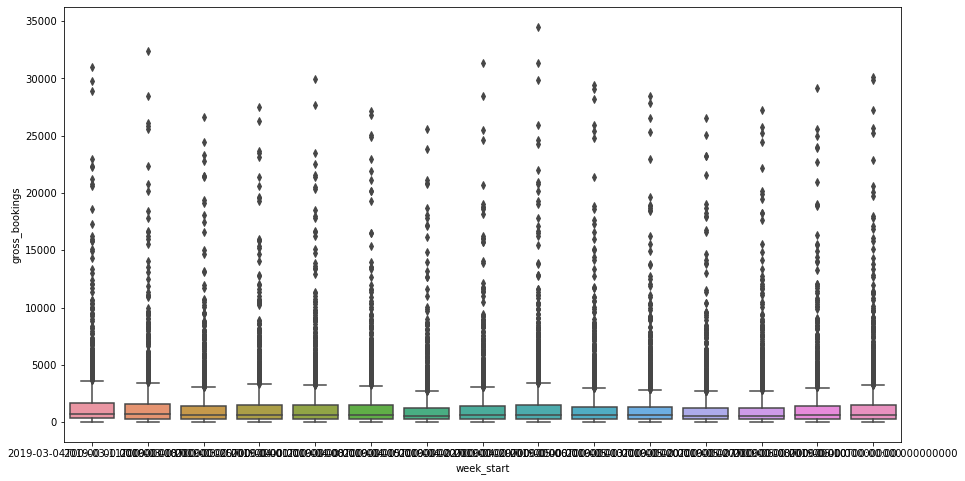

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot('week_start', 'gross_bookings', data=df1)

/Users/Aurane/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restaurant_uuid', ylabel='gross_bookings'>

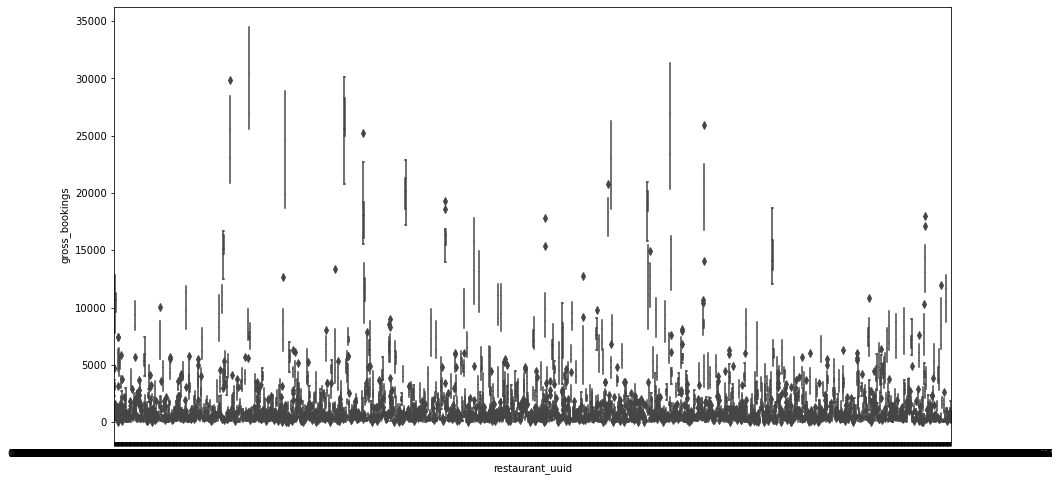

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot('restaurant_uuid', 'gross_bookings', data=df1)

In [ ]:
df3 = pd.merge(df1,df2,on='restaurant_uuid',how='left')

In [ ]:
#We replace the missing values by the mean
df3['gross_bookings'] = df3['gross_bookings'].fillna((df3['gross_bookings'].mean()))

In [ ]:
## Multiple linear regression to understand which variables are important for the gross bookings
X = df3[['eater_requests','accepted_orders', 'completed_orders','available_to_eaters_minutes', 'courier_to_resto_reviews', 'eater_to_resto_reviews','damaged_orders','late_orders','preparation_time',]]

In [ ]:
Y = df3['gross_bookings']

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 239.41569748618826
Coefficients: 
 [ 1.77320359  9.70205509  6.35333404 -0.05875328 -0.16537218  0.29022676
 13.19405844 -8.29791433 -0.96343359]


In [ ]:
## Top 3 most important variables for the gross bookings : accepted orders, completed orders and eater requests

In [ ]:
## Multiple linear regression to understand which variables are important for the delivery partner satisfaction
X2 = df3[['eater_requests','accepted_orders', 'completed_orders','available_to_eaters_minutes', 'eater_to_resto_reviews','damaged_orders','late_orders','preparation_time',]]

In [ ]:
Y2 = df3['courier_to_resto_reviews']

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X2, Y2)

LinearRegression()

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -1.1080090314425917
Coefficients: 
 [ 4.95967106e-01  3.61025592e-01 -3.62823308e-01  2.27263463e-04
  1.58670678e-02 -8.94640369e-01 -1.94198856e-01  5.27498045e-03]


In [ ]:
## Top 3 most important variables for the delivery partner satisfaction : preparation time, eater requests 
## and accepted orders

In [ ]:
## Multiple linear regression to understand which variables are important for the customer
X3 = df3[['eater_requests','accepted_orders', 'gross_bookings','completed_orders','available_to_eaters_minutes', 'courier_to_resto_reviews','eater_to_resto_reviews','damaged_orders','late_orders','preparation_time',]]

In [ ]:
Y3 = df3['eater_to_resto_reviews']

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X3, Y3)

LinearRegression()

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -1.2931877790833823e-12
Coefficients: 
 [-8.12156294e-16 -3.63820783e-15 -9.81176226e-17  3.60396564e-15
  4.26966061e-16 -1.81822504e-16  1.00000000e+00 -1.54400127e-15
  1.63209261e-16  9.57883136e-18]


In [ ]:
## Top 3 most important variables for the eater : preparation time, availability of the restaurant 
## and completed orders